# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

# Paso 1: Instalación de dependencias

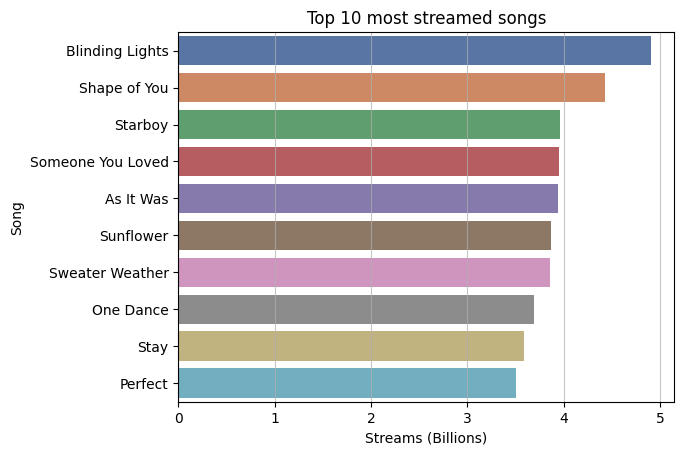

In [21]:
# Paso 1: Instalación de dependencias
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import sqlite3

    
def top_10(df):
    ax = sns.barplot(data=df.iloc[:10], y='Song', x='Streams (Billions)', palette='deep', hue='Song')
    plt.title('Top 10 most streamed songs')
    ax.grid(axis='x', alpha=0.7)
    plt.show()


def get_data(URL):
    html_content = None
    try:
        response = requests.get(URL)
        html_content = response.text
    except Exception as e:
        print('An error occured: ', e)

    df = None
    if response.status_code == 200 and html_content:
        try:
            tables = pd.read_html(StringIO(html_content))

            if tables:
                df = tables[0]
            else:
                print("No table was found")
        except Exception as e:
            print('An unexpected error occured while trying to get the first table data: ', e)
    return df

def clean_data(df):
    if df is not None:
        try:
            # Paso 4: Procesa el DataFrame
            df.drop('Ref.', axis=1, inplace=True)
            df.columns = ['Rank', 'Song', 'Artist', 'Streams (Billions)', 'Release date']
            df['Song'] = df['Song'].str.replace('"', '')
            df = df.drop(df.index[-1])
            df['Rank'] = pd.to_numeric(df['Rank'])
            df['Streams (Billions)'] = pd.to_numeric(df['Streams (Billions)'])
            return df
        except Exception as e:
            print(e)
    else:
        print('There is no data in the table')

# Crear BDO
def creating_bdo(df):
    conn = sqlite3.connect('top_streaming_spotify_songs.db')
    df.to_sql('top_streaming_spotify_songs', conn)
    cursor = conn.cursor()
    cursor.execute('SELECT * FROM top_streaming_spotify_songs')
    cursor.fetchall()

def main():
    URL = "https://en.wikipedia.org/wiki/List_of_most-streamed_songs_on_Spotify"
    df = get_data(URL)
    df = clean_data(df)
    top_10(df)
    creating_bdo(df)

main()
